In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.spatial import Delaunay
import plotly.figure_factory as ff
from random import sample

##Importando as bibliotecas utilizadas

In [9]:
df = pd.read_csv("tibia.csv")
df

,HP,XP,MaxGold,Name
0,7350,4650,999,Dark Torturer
1,8200,6000,700,Demon
2,20000,11200,1694,Juggernaut
3,9500,7216,997,Grimeleech
4,14000,11000,1282,Hellflayer
5,8500,6248,982,Vexclaw
6,5300,4700,1100,Crazed Summer Rearguard
7,5500,5000,1300,Crazed Summer Vanguard
8,4000,2500,636,Behemoth
9,3500,1760,600,Breach Brood


##Importando o dataset para um dataframe do pandas


In [10]:
X = df.iloc[:,0:2].values
X = stats.zscore(X)
X

array([[ 0.41437845,  0.12913526],
       [ 0.65393411,  0.70837345],
       [ 3.97953036,  2.93951317],
       [ 1.02031336,  1.23011689],
       [ 2.28854922,  2.8537001 ],
       [ 0.73848317,  0.81478165],
       [-0.16337344,  0.15058852],
       [-0.1070074 ,  0.27930812],
       [-0.52975269, -0.7933552 ],
       [-0.67066778, -1.11086355],
       [-0.38883759, -0.83626174],
       [-0.5579357 , -0.80193651],
       [-0.89613193, -1.21383923],
       [-0.98068099, -1.11300887],
       [-0.36065457, -0.62172907],
       [-0.6988508 , -0.75044867],
       [-0.47338665, -0.36428987],
       [ 0.85121525,  0.64401365],
       [ 0.17482279,  0.70837345],
       [-0.38883759, -0.06394414],
       [-0.5579357 , -0.06394414],
       [-0.2479225 ,  0.15058852],
       [ 0.45665298,  0.27930812],
       [-1.34706024, -1.3082336 ],
       [ 0.10436524, -0.23557027],
       [-0.09291589, -0.06394414],
       [-0.2479225 , -0.53591601],
       [-0.48747816, -0.83626174],
       [-0.9947725 ,

##Atribuindo a matriz X as variáveis categóricas, e então as padronizando via Z-Score

In [12]:
y = df['MaxGold'].values
y

array([ 999,  700, 1694,  997, 1282,  982, 1100, 1300,  636,  600,  900,
        700,  400,  473,  997,  800, 1020,  699,  400,  500,  500, 1400,
        967,  800,  983,  990,  700,  700,  550,  798,  800,  900],
      dtype=int64)

##Atribuindo a o vetor y a variável alvo

In [33]:
r = sample(range(0, 300), 10)
r

[190, 41, 13, 103, 201, 145, 167, 128, 45, 0]

##Gerando uma lista com 10 valores entre 0 e 300

In [34]:
y_pred = []
for i in r:
  aux = ((((i+1)*0.57)/111)*X[:,0])**2 + (((0.87*i)/13)*X[:,1])**3 - 23
  y_pred.append(aux)
# y_pred

[array([-1.84076799e+01,  7.08172328e+02,  5.22095735e+04,  3.80472998e+03,
         4.77584466e+04,  1.08954368e+03, -1.59538870e+01,  2.18070113e+01,
        -1.04930703e+03, -2.84075978e+03, -1.22516102e+03, -1.08295098e+03,
        -3.69904442e+03, -2.85662654e+03, -5.16948906e+02, -8.91393529e+02,
        -1.22171473e+02,  5.26825200e+02,  7.07790354e+02, -2.33920675e+01,
        -2.32380553e+01, -1.59204342e+01,  2.19966015e+01, -4.62429072e+03,
        -4.98646144e+01, -2.35292101e+01, -3.39371626e+02, -1.22507786e+03,
        -1.86938128e+03, -5.94420596e+01,  7.76206524e+02,  4.57915954e+01]),
 array([-22.94752774, -15.63723395, 502.4299377 ,  15.50037947,
        457.31329011, -11.80077807, -22.92821529, -22.54934565,
        -33.30225612, -51.29700182, -35.0740523 , -33.63918969,
        -59.90824968, -51.43757026, -27.95853283, -31.70784491,
        -23.9882427 , -17.4485146 , -15.65570391, -22.99836812,
        -22.99092102, -22.92659771, -22.54017821, -69.16808881,
      

##Dada uma equação aleatória baseada nos valores da matriz X (como coeficientes), percorre-se a lista e adiciona-se os vetores em uma nova variável.

In [35]:
mae = []
mse = []
for vetor in y_pred:
  mae.append(mean_absolute_error(y, vetor))
  mse.append(mean_squared_error(y, vetor))
print(f'MAE: {mae}')
print(f'MSE: {mse}')
best_mae = min(mae)
best_mse = min(mse)
best_mae_index = np.argmin(mae)
best_mse_index = np.argmin(mse)

MAE: [4456.714457268323, 848.104128772085, 874.2297141251676, 1254.7755069361897, 5194.361278591685, 2314.9655355913437, 3212.672902883247, 1786.7588100585372, 839.4146953567783, 875.0937236303871]
MSE: [150862649.5054327, 776852.2108482402, 848757.2968565641, 3450051.509647945, 213084522.12619787, 28259809.43397776, 68053680.20071134, 12960129.537348233, 759616.3920355269, 851647.4617160737]


##2 listas são criadas, com uma para armazenar o MAE (mean absolute error), e outra o MSE (mean squared error). percorre-se a lista de vetores e, dado o y real, são calculados tais erros. Os menores erros e seus índices serão adicionados às suas respectivas variáveis.

In [36]:
print(f'o melhor valor de MAE é {best_mae}, no índice {best_mae_index}')
print(f'o melhor valor de MSE é {best_mse}, no índice {best_mse_index}')

o melhor valor de MAE é 839.4146953567783, no índice 8
o melhor valor de MSE é 759616.3920355269, no índice 8


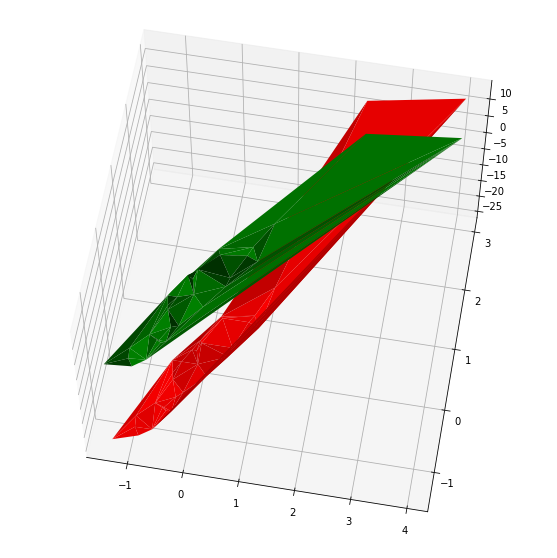

In [ ]:
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
ax.plot_trisurf(X[:,0], X[:,1], y_pred[best_mae_index],color = 'red')
ax.plot_trisurf(X[:,0], X[:,1], y, color = 'green')
ax.view_init(elev=60, azim=-80)

plt.show()

##É gerada uma imagem com as superfícies, sendo que em verde temos a original, e em vermelho a estimada com o melhor MAE encontrado.

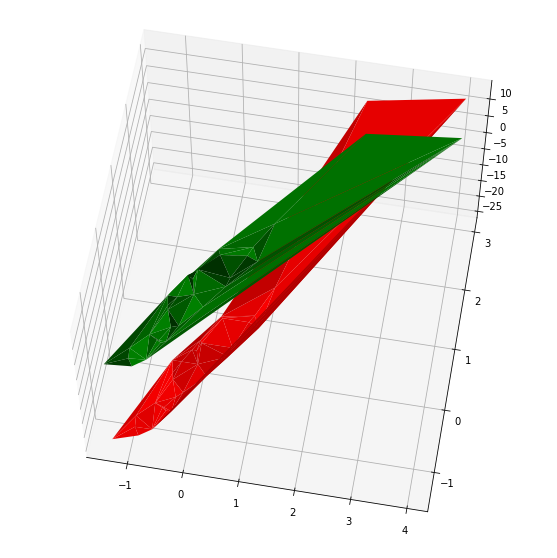

In [ ]:
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
ax.plot_trisurf(X[:,0], X[:,1], y_pred[best_mse_index],color = 'red')
ax.plot_trisurf(X[:,0], X[:,1], y, color = 'green')
ax.view_init(elev=60, azim=-80)

plt.show()

##É gerada uma imagem com as superfícies, sendo que em verde temos a original, e em vermelho a estimada com o melhor MSE encontrado.